In [1]:
import pandas as pd
import numpy as np

DataFrame = pd.read_csv("Salary_dataset.csv")
DataFrame.head()

,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892


In [2]:
X = np.array(DataFrame.iloc[:,0])
Y = np.array(DataFrame.iloc[:,1])
print(X);print(Y)

[ 1.2  1.4  1.6  2.1  2.3  3.   3.1  3.3  3.3  3.8  4.   4.1  4.1  4.2
  4.6  5.   5.2  5.4  6.   6.1  6.9  7.2  8.   8.3  8.8  9.1  9.6  9.7
 10.4 10.6]
[ 39344  46206  37732  43526  39892  56643  60151  54446  64446  57190
  63219  55795  56958  57082  61112  67939  66030  83089  81364  93941
  91739  98274 101303 113813 109432 105583 116970 112636 122392 121873]


In [3]:
intercept = 1000
slope = 1000

def predict(X,intercept,slope):
    Y = []
    for i in range(0,len(X)):
        Y.append( float(slope*X[i] + intercept) )
    return Y

predicted_Y = predict(X,intercept,slope)
print(predicted_Y)

[2200.0, 2400.0, 2600.0, 3100.0, 3300.0, 4000.0, 4100.0, 4300.0, 4300.0, 4800.0, 5000.0, 5100.0, 5100.0, 5200.0, 5600.0, 6000.0, 6200.0, 6400.0, 7000.0, 7100.0, 7900.0, 8200.0, 9000.0, 9300.0, 9800.0, 10100.0, 10600.0, 10700.0, 11400.0, 11600.0]


In [4]:
def rmse(predicted_Y,Y):
    RMSE = 0
    for i in range(len(Y)):
        RMSE += (1/len(Y))*(predicted_Y[i] - Y[i])**2
    return RMSE
RMSE = rmse(predicted_Y,Y)
print(RMSE)

5430006451.066666


In [5]:
def R_squared_error(predicted_Y,Y):
    RSS = 0
    TSS = 0
    for i in range(len(Y)):
        RSS += (Y[i] - predicted_Y[i])**2
    for j in range(len(Y)):
        TSS += (Y[i] - np.mean(Y))**2
    R_SQ_E = 1 - (RSS/TSS)
    return R_SQ_E
R_squared = R_squared_error(predicted_Y,Y)
print(R_squared)

-1.5808442799907496


In [6]:
learning_rate = 0.01
def update_weights(slope,intercept,predicted_Y,Y,X):
    dTheta1 = 0
    dTheta2 = 0
    for i in range(len(Y)):
        dTheta1 += (2/len(Y))*(predicted_Y[i] - Y[i])
        dTheta2 += (2/len(Y))*(predicted_Y[i] - Y[i])*X[i]
    Intercept = intercept - learning_rate*dTheta1
    Slope = slope - learning_rate*dTheta2
    return (Slope,Intercept)

slope,intercept = update_weights(slope,intercept,predicted_Y,Y,X)
print(slope,"   ",intercept)

9850.034933333332     2391.8133333333326


In [7]:
iterations = 200
for i in range(iterations):
    print(f"Iteration No : {i+1}")
    predicted_Y = predict(X,intercept,slope)
    print(f"Predicted Y : {predicted_Y}")
    RMSE = rmse(predicted_Y,Y)
    print(f"Root Mean Squared Error : {RMSE}")
    slope,intercept = update_weights(slope,intercept,predicted_Y,Y,X)
    print(f"Slope : {slope} , Intercept : {intercept}")
    R_squared = R_squared_error(predicted_Y,Y)
    print(f"R_Squared_Error : {R_squared}")
    print("\n")

Iteration No : 1
Predicted Y : [14211.855253333331, 16181.862239999999, 18151.869226666666, 23076.88669333333, 25046.893679999994, 31941.91813333333, 32926.92162666666, 34896.92861333333, 34896.92861333333, 39821.946079999994, 41791.95306666666, 42776.95655999999, 42776.95655999999, 43761.96005333333, 47701.974026666656, 51641.98799999999, 53611.994986666665, 55582.00197333333, 61492.02293333333, 62477.026426666656, 70357.05437333333, 73312.06485333333, 81192.0928, 84147.10328000001, 89072.12074666667, 92027.13122666666, 96952.14869333332, 97937.15218666666, 104832.17664, 106802.18362666667]
Root Mean Squared Error : 444228083.6834337
Slope : 11984.544963363554 , Intercept : 2797.626617884444
R_Squared_Error : 0.7888614831092093


Iteration No : 2
Predicted Y : [17179.08057392071, 19575.98956659342, 21972.898559266134, 27965.17104094791, 30362.08003362062, 38751.261507975105, 39949.71600431146, 42346.624996984174, 42346.624996984174, 48338.89747866595, 50735.80647133866, 51934.26096767

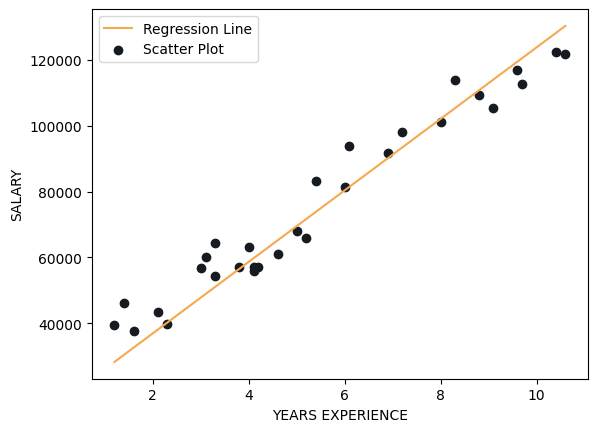

In [9]:
import matplotlib.pyplot as plt
x_max = np.max(X)
x_min = np.min(X)
length = len(X)

x_plot = np.linspace(x_max, x_min, length)
y_plot = (slope * x_plot) + intercept

plt.plot(x_plot, y_plot, color = '#F4A950', label = 'Regression Line')
plt.scatter(X, Y, color = '#161B21', label = 'Scatter Plot')
plt.xlabel('YEARS EXPERIENCE')
plt.ylabel('SALARY')
plt.legend()
plt.show()